# Final report

## Importing neccessery libraries and data

In [12]:
!pip install plotly

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [0]:
data = pd.read_csv("data_for_ml.csv")
data2 = pd.read_csv("ML_report.csv")

## Inspecting the data

In [15]:
data.head()

,Unnamed: 0,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,...,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,Winner_Red,title_bout_True
0,0,5,0.0,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,...,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
1,1,5,0.0,3.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,9.300000,12.800000,9.60000,101.700000,32.000000,8.100000,6.900000,97.700000,30.800000,...,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1
2,2,3,0.0,3.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,8.419355,5.83871,84.548387,38.064516,1.741935,0.935484,67.645161,25.483871,...,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,3,3,0.0,4.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,6.000000,6.000000,3.75000,94.250000,26.750000,1.750000,1.250000,82.500000,21.500000,...,20.0,690.25,0.0,0.0,1.0,4.0,1.0,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,4,3,0.0,1.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,0.000000,184.500000,45.000000,0.000000,2.0,2.000000,0.000000,0.000000,203.50,61.500000,0.310000,0.000000,0.00000,0.000000,0.000000,204.000000,62.000000,1.0,1.0,42.500000,23.500000,0.500000,0.50000,205.000000,89.500000,0.000000,0.000000,152.500000,56.500000,...,7.0,440.75,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [16]:
data.shape

(3592, 159)

In [17]:
data2.head()

,Unnamed: 0,Decision Tree,Random Forest,Improvment
0,test_accuracy,38.9,47.9,9.1
1,test_average_precision,64.4,64.7,0.3
2,test_recall,38.1,51.2,13.2
3,test_f1,32.7,47.5,14.7


In [0]:
data2.rename(columns={"Unnamed: 0": "Tests"}, inplace=True)
data2 = data2.set_index("Tests")

In [19]:
data2

,Decision Tree,Random Forest,Improvment
Tests,,,
test_accuracy,38.9,47.9,9.1
test_average_precision,64.4,64.7,0.3
test_recall,38.1,51.2,13.2
test_f1,32.7,47.5,14.7


In [20]:
data2.shape

(4, 3)

## Report

### Machine learning report

In [21]:
data2

,Decision Tree,Random Forest,Improvment
Tests,,,
test_accuracy,38.9,47.9,9.1
test_average_precision,64.4,64.7,0.3
test_recall,38.1,51.2,13.2
test_f1,32.7,47.5,14.7


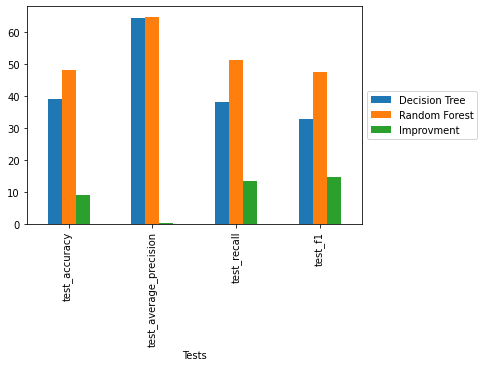

In [22]:
ax = data2.plot(kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


### Correlation in dataset

We will just take a look on correlation of this data. \\
We could see that there are not much corelation between this data but we could see two squares that are more distinct than anything else on this graph. \\
This two squares are visible because we have two teams, Blue and Red that corelate between themselves. 

In [0]:
corr_matrix = data.corr()

In [24]:
fig = go.Figure(data=go.Heatmap(x=corr_matrix.columns, y=corr_matrix.columns, z=corr_matrix))
fig.show()

### Dataset Report

If we want to make a bet for how many rounds will the match last we could see that 88.68% of rounds finish in round 3. 

In [25]:
px.histogram(data, x=data.no_of_rounds, title="Number of rounds")

In the next plot we could see how Red team has significantly more wins than Blue team.  \\
For superstitious fighters I would suggest to take Red shorts. 

In [26]:
win_data = pd.DataFrame([["Blue", data.B_wins.sum()] , ["Red", data.R_wins.sum()]], columns = ['team', 'winner'])
px.pie(win_data, values="winner", color="team", names="team", title="Wins per team")

Next pie chart is one that shows how many KO wins compared to regular wins has blue team. 

In [27]:
KO = pd.DataFrame([[(data["R_win_by_KO/TKO"].sum() / data["R_wins"].sum()*100), (data["B_win_by_KO/TKO"].sum() / data["B_wins"].sum()*100)], [100 - (data["R_win_by_KO/TKO"].sum() / data["R_wins"].sum()*100), 100 - (data["B_win_by_KO/TKO"].sum() / data["B_wins"].sum()*100)]], columns = ['Blue', 'Red'])
KO
px.pie(KO, values="Blue", color="Blue", names=('KO wins', 'Regular wins'), title="Percentage of KO wins")

Here we could see age groups that have the most contestants in UFC, and we see here that most of the fighters are in range of 25 to 35. 

In [28]:
age = pd.concat([data['R_age'], data['B_age']], ignore_index=True)
age_values = age.value_counts()
age_labels = age_values.index
px.bar(x=age_labels,y=age_values)

Finally we here see the win streaks of blue and red team. Blue team has more streaks in general and Blue team also has less fighters with streak of 0. 

In [29]:
temp = data.B_current_win_streak.value_counts()
new = pd.DataFrame({'Number of maches':temp.index, 'Count':temp.values})
fig = px.bar(new, x="Number of maches", y="Count", title="Blue Win Streak")
fig.show()

In [30]:
temp = data.R_current_win_streak.value_counts()
new = pd.DataFrame({'Number of maches':temp.index, 'Count':temp.values})
fig = px.bar(new, x="Number of maches", y="Count", title="Red Win Streak")
fig.show()